In [1]:
import os

# change working directory, run this cell once
os.chdir("../")

In this notebook, we will demonstrate an example on how to use the ``AutoCluster`` class for clustering.

### Import packages

In [2]:
# we will be using sample datasets in sklearn
from sklearn import datasets
import pandas as pd

# autocluster functionalities
from autocluster import AutoCluster
from evaluators import get_evaluator
from utils.metafeatures import MetafeatureMapper

%load_ext autoreload
%autoreload 2

### Load sklearn digits dataset

In [3]:
digits_df = pd.DataFrame(datasets.load_digits()['data'])
digits_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


- Note that we are converting the dataset from ``numpy`` format to ``pandas DataFrame`` format. 
- This is because the ``AutoCluster.fit()`` function only accepts ``DataFrame`` format as input.
- There are 64 columns in this dataset, named ``0``, ``1``, ``2`` ... and so on. 

In [4]:
print("Shape of this dataframe is {}".format(digits_df.shape))

Shape of this dataframe is (1797, 64)


### Finding an optimal clustering model using random optimization

In [7]:
cluster = AutoCluster()
fit_params = {
    "df": digits_df, 
    "cluster_alg_ls": [
        'KMeans', 'GaussianMixture', 'MiniBatchKMeans'
    ], 
    "dim_reduction_alg_ls": [
        'TSNE', 'PCA', 'IncrementalPCA', 
        'KernelPCA', 'FastICA', 'TruncatedSVD', 'NullModel'
    ],
    "optimizer": 'random',
    "n_evaluations": 50,
    "run_obj": 'quality',
    "seed": 27,
    "cutoff_time": 30,
    "preprocess_dict": {
        "numeric_cols": list(range(64)),
        "categorical_cols": [],
        "ordinal_cols": [],
        "y_col": []
    },
    "evaluator": get_evaluator(evaluator_ls = ['silhouetteScore'], 
                               weights = [], clustering_num = None, 
                               min_proportion = .05),
    "n_folds": 4,
    "warmstart": False
}
result_dict = cluster.fit(**fit_params)

1443/1797 datapoints remaining after outlier removal
Configuration space object:
  Hyperparameters:
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1000], Default: 100
    clustering_choice, Type: Categorical, Choices: {KMeans, GaussianMixture, MiniBatchKMeans}, Default: KMeans
    covariance_type___GaussianMixture, Type: Categorical, Choices: {full, tied, diag, spherical}, Default: full
    dim_reduction_choice, Type: Categorical, Choices: {TSNE, PCA, IncrementalPCA, KernelPCA, FastICA, TruncatedSVD, NullModel}, Default: TSNE
    early_exaggeration___TSNE, Type: UniformFloat, Range: [5.0, 20.0], Default: 12.0
    fun___FastICA, Type: Categorical, Choices: {logcosh, exp, cube}, Default: log

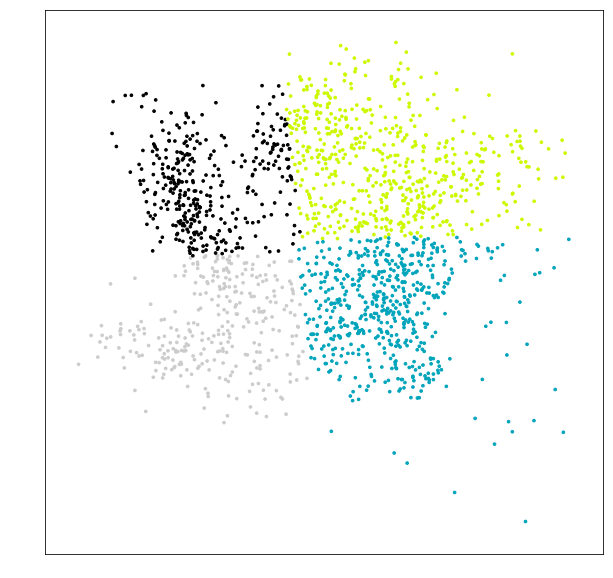

In [6]:
predictions = cluster.predict(digits_df)

In [ ]:
n